In [1]:
import torch, torchvision
from torchvision.datasets.utils import download_url
torchvision.set_video_backend("video_reader")

#if you don't have the file 
# download_url("https://github.com/pytorch/vision/blob/master/test/assets/videos/WUzgd7C1pWA.mp4?raw=true", ".", "WUzgd7C1pWA.mp4")

"""
chosen video statistics:
WUzgd7C1pWA.mp4
  - source: kinetics-400
  - video: H-264 - MPEG-4 AVC (part 10) (avc1)
    - fps: 29.97
  - audio: MPEG AAC audio (mp4a)
    - sample rate: 48K Hz
"""
video_path = "WUzgd7C1pWA.mp4"
stream = "video"


video = torchvision.io.VideoReader(video_path, stream)

/home/bjuncek/work/vision_bruno/torchvision/__init__.py:78: UserWarning: video_reader video backend is not available. Please compile torchvision from source and try again
  warnings.warn(message)


RuntimeError: Not compiled with video_reader support, to enable video_reader support, please install ffmpeg (version 4.2 is currently supported) andbuild torchvision from source.

In [ ]:
# video.set_current_stream("video:0")
# video.seek(0)

# This generates single frame, and if you're using my fork dumps all the binaries
frame = next(video)


import matplotlib.pylab as plt
%matplotlib inline

plt.imshow(frame['data'].permute(1, 2, 0))
plt.axis("off")
print(frame['data'].permute(1, 2, 0).shape, frame['pts'])

In [57]:
import numpy as np
import cv2
YUV = np.fromfile("inVideoStreamPreTransform.binary", dtype=np.uint8)
# Reshape data to numpy array with height*1.5 rows
# YUV = pre.reshape(340*3//2, 256)

nl = len(YUV)
print(nl)

130560


In [195]:
YUV = np.fromfile("inVideoStreamTestStuff.binary", dtype=np.uint8)
w, h = 340, 256
Y = YUV[0:w*h].reshape(h,w)

# Take next px/4 samples as U
U = YUV[px:(px*5)//4].reshape(h//2,w//2)

# Take next px/4 samples as V
V = YUV[(px*5)//4:(px*6)//4].reshape(h//2,w//2)


(256, 340)


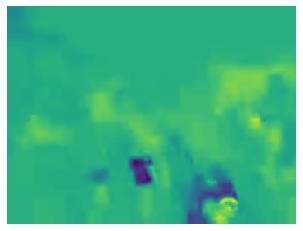

In [191]:
w, h = 340, 256
px = w*h

# Take first h x w samples and reshape as Y channel
idxy = ((np.arange(0, w) + (np.arange(0, h) * 384)[:, None]).reshape(-1)).astype(int)
y = YUV[idxy].reshape(h,w)

uv_idx = np.setdiff1d(np.arange(0, len(YUV)), idxy).astype(int)


u = YUV[uv_idx].reshape(128, 170)

# # Take next px/4 samples as V
# # idx = ((np.arange(0, w//4) + (np.arange(0, h//2) * 384 + w + w//4)[:, None]).reshape(-1)).astype(int)
# idxb = ((np.arange(0, w) + (np.arange(0, h//4) * 384 + w)[:, None]).reshape(-1)).astype(int)
# v = YUV[idxa[len(idxa)//2:]].reshape(h//2 ,w//2)

# print(len(idx) + len(idxa) + len(idxb), len(YUV))

# # # Undo subsampling of U and V by doubling height and width
# # Ufull = U.copy().resize((w,h))
# # Vfull = V.copy().resize((w,h))

# print(y.shape, u.shape, v.shape)


ValueError: cannot reshape array of size 43520 into shape (128,170)

In [190]:
uv_idx[:200]

array([ 340,  341,  342,  343,  344,  345,  346,  347,  348,  349,  350,
        351,  352,  353,  354,  355,  356,  357,  358,  359,  360,  361,
        362,  363,  364,  365,  366,  367,  368,  369,  370,  371,  372,
        373,  374,  375,  376,  377,  378,  379,  380,  381,  382,  383,
        724,  725,  726,  727,  728,  729,  730,  731,  732,  733,  734,
        735,  736,  737,  738,  739,  740,  741,  742,  743,  744,  745,
        746,  747,  748,  749,  750,  751,  752,  753,  754,  755,  756,
        757,  758,  759,  760,  761,  762,  763,  764,  765,  766,  767,
       1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118,
       1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129,
       1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140,
       1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151,
       1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502,
       1503, 1504, 1505, 1506, 1507, 1508, 1509, 15

(128, 170)


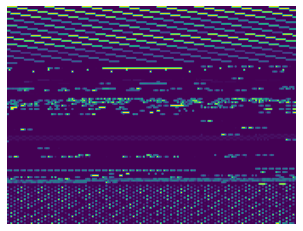

In [187]:
import matplotlib.pyplot

matplotlib.pyplot.imshow(u)
matplotlib.pyplot.axis("off")
print(u.shape)

(256, 340)


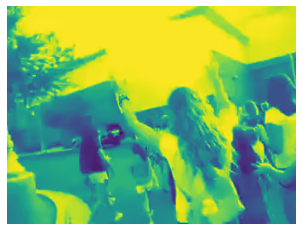

In [54]:
import matplotlib.pyplot

matplotlib.pyplot.imshow(y)
matplotlib.pyplot.axis("off")
print(y.shape)

(128, 170)


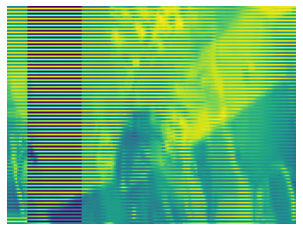

In [55]:
import matplotlib.pyplot

matplotlib.pyplot.imshow(v)
matplotlib.pyplot.axis("off")
print(v.shape)

In [1]:
import io
# Open In-memory bytes streams (instead of using fifo)
f = io.BytesIO()

# Write Y, U and V to the "streams".
f.write(y.tobytes())
f.write(u.tobytes())
f.write(v.tobytes())

f.seek(0)
###############################################################################

# Read YUV420 (I420 planar format) and convert to BGR
###############################################################################
data = f.read(y.size*3//2)  # Read one frame (number of bytes is width*height*1.5).

# Reshape data to numpy array with height*1.5 rows
yuv_data = np.frombuffer(data, np.uint8).reshape(y.shape[0]*3//2, y.shape[1])

# Convert YUV to BGR
bgr = cv2.cvtColor(yuv_data, cv2.COLOR_YUV2BGR_I420);

f.seek(0)
y = np.frombuffer(f.read(y.size), dtype=np.uint8).reshape((y.shape[0], y.shape[1]))  # Read Y color channel and reshape to height x width numpy array
u = np.frombuffer(f.read(y.size//4), dtype=np.uint8).reshape((y.shape[0]//2, y.shape[1]//2))  # Read U color channel and reshape to height x width numpy array
v = np.frombuffer(f.read(y.size//4), dtype=np.uint8).reshape((y.shape[0]//2, y.shape[1]//2))  # Read V color channel and reshape to height x width numpy array

# Resize u and v color channels to be the same size as y
u = cv2.resize(u, (y.shape[1], y.shape[0]))
v = cv2.resize(v, (y.shape[1], y.shape[0]))
yvu = cv2.merge((y, v, u)) # Stack planes to 3D matrix (use Y,V,U ordering)



NameError: name 'y' is not defined

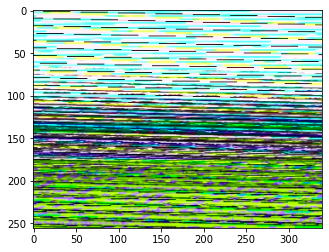

In [31]:
import matplotlib.pyplot
matplotlib.pyplot.imshow(bgr)

(240, 560, 3)


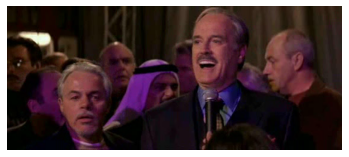

In [15]:
import av
# av_reader= av.open("WUzgd7C1pWA.mp4")
av_reader= av.open("RATRACE_wave_f_nm_np1_fr_goo_37.avi")


# av_reader= av.open("./011f8481-b14725fa.mov")

av_reader.streams.video[0].thread_type = "AUTO"

av_reader.seek(0)
frame = next(av_reader.decode(av_reader.streams.video[0]))

import matplotlib.pylab as plt
%matplotlib inline

plt.imshow(frame.to_rgb().to_ndarray())
plt.axis("off")
print(frame.to_rgb().to_ndarray().shape)

(720, 1280, 3)


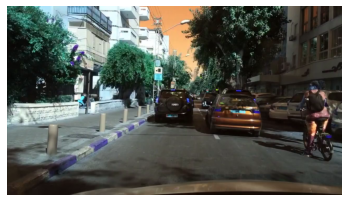

In [1]:
import cv2
cap = cv2.VideoCapture("./011f8481-b14725fa.mov")
ret, frame = cap.read()

import matplotlib.pylab as plt
%matplotlib inline

plt.imshow(frame)
plt.axis("off")
print(frame.shape)

In [24]:
torchvision.io.read_video("WUzgd7C1pWA.mp4", start_pts=0, end_pts=1000)

(tensor([[[[125, 169, 205],
           [124, 168, 204],
           [122, 166, 202],
           ...,
           [255, 255, 255],
           [255, 255, 255],
           [255, 255, 255]],
 
          [[ 90, 134, 170],
           [107, 151, 187],
           [139, 183, 219],
           ...,
           [255, 255, 255],
           [255, 255, 255],
           [255, 255, 255]],
 
          [[ 81, 125, 161],
           [102, 146, 182],
           [144, 188, 224],
           ...,
           [255, 255, 255],
           [255, 255, 255],
           [255, 255, 255]],
 
          ...,
 
          [[107, 106, 109],
           [108, 107, 110],
           [109, 108, 111],
           ...,
           [ 91,  62,  67],
           [ 92,  63,  68],
           [ 94,  65,  70]],
 
          [[107, 106, 109],
           [108, 107, 110],
           [109, 108, 111],
           ...,
           [ 90,  61,  66],
           [ 91,  62,  67],
           [ 92,  63,  68]],
 
          [[107, 106, 109],
           [108, 107

In [41]:
## Cleanup
import os, shutil
os.remove("./WUzgd7C1pWA.mp4")
shutil.rmtree("./dataset")

In [14]:
video.seek(2)
data = next(video)
print(data['pts'])

2.002


In [16]:
video.seek(9, keyframes_only=True)
data = next(video)
print(data['pts'])

8.341667


In [11]:
import av
with av.open("./WUzgd7C1pWA.mp4") as container:
    # Signal that we only want to look at keyframes.
    stream = container.streams.video[0]
    stream.codec_context.skip_frame = 'NONKEY'

    for frame in container.decode(stream):

        print(float(frame.time_base*frame.pts))

0.0
8.341666666666667


In [3]:
import av
av_reader= av.open("WUzgd7C1pWA.mp4")

In [15]:
av_reader.streams.video[0].codec.properties

<av.codec.Properties:LOSSY|LOSSLESS|REORDER(0xe)>

In [2]:
import numpy as np


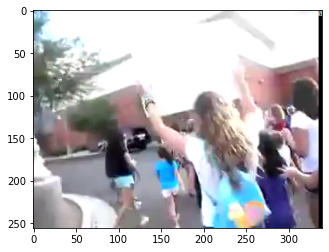

In [5]:
pre= np.fromfile("vision_bruno/inVideoStreamPostTransform.binary", dtype=np.uint8)
# pre.reshape(256, 340)
import matplotlib.pyplot
matplotlib.pyplot.imshow(pre.reshape(256, 340, 3))

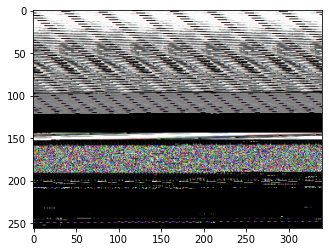

In [15]:
pre= np.fromfile("inVideoStreamPreTransform.binary", dtype=np.uint8)
import matplotlib.pyplot
matplotlib.pyplot.imshow()

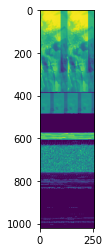

In [17]:
test = pre.reshape(340 * 3, 256)


In [31]:
ysize = 340
xsize = 256
pre= np.fromfile("inVideoStreamPreTransform.binary", dtype=np.uint8)
new_frame = np.empty((256, 340, 3), dtype=np.uint8)
start_x = 0
for i in range(ysize-1):
    end_x = start_x + xsize
    c = 0
    while c < 3:
        print(i, c, start_x, end_x, pre[start_x:end_x, ...].shape)
        new_frame[0:xsize, i,  c] = pre[start_x:end_x, ...]
        c = c + 1
        start_x = start_x + xsize * c
        end_x = start_x + xsize

    start_x = xsize + xsize * (i + 1) * 3 

    

0 0 0 256 (256,)
0 1 256 512 (256,)
0 2 768 1024 (256,)
1 0 1024 1280 (256,)
1 1 1280 1536 (256,)
1 2 1792 2048 (256,)
2 0 1792 2048 (256,)
2 1 2048 2304 (256,)
2 2 2560 2816 (256,)
3 0 2560 2816 (256,)
3 1 2816 3072 (256,)
3 2 3328 3584 (256,)
4 0 3328 3584 (256,)
4 1 3584 3840 (256,)
4 2 4096 4352 (256,)
5 0 4096 4352 (256,)
5 1 4352 4608 (256,)
5 2 4864 5120 (256,)
6 0 4864 5120 (256,)
6 1 5120 5376 (256,)
6 2 5632 5888 (256,)
7 0 5632 5888 (256,)
7 1 5888 6144 (256,)
7 2 6400 6656 (256,)
8 0 6400 6656 (256,)
8 1 6656 6912 (256,)
8 2 7168 7424 (256,)
9 0 7168 7424 (256,)
9 1 7424 7680 (256,)
9 2 7936 8192 (256,)
10 0 7936 8192 (256,)
10 1 8192 8448 (256,)
10 2 8704 8960 (256,)
11 0 8704 8960 (256,)
11 1 8960 9216 (256,)
11 2 9472 9728 (256,)
12 0 9472 9728 (256,)
12 1 9728 9984 (256,)
12 2 10240 10496 (256,)
13 0 10240 10496 (256,)
13 1 10496 10752 (256,)
13 2 11008 11264 (256,)
14 0 11008 11264 (256,)
14 1 11264 11520 (256,)
14 2 11776 12032 (256,)
15 0 11776 12032 (256,)
15 1 1203

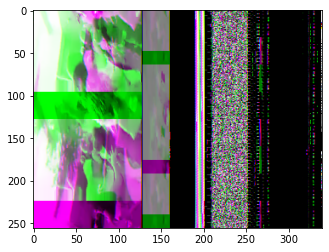

In [32]:
import matplotlib.pyplot
matplotlib.pyplot.imshow(new_frame)

In [35]:
pre= np.fromfile("vision_bruno/frame-1.pgm", dtype=np.uint8)
import matplotlib.pyplot
matplotlib.pyplot.imshow(pre[16:].reshape(256, 340))

ValueError: cannot reshape array of size 87039 into shape (256,340)

In [ ]:
 for (i = 0; i < ysize; i++)
    fwrite(buf + i * wrap, 1, xsize, f);
  fclose(f);